In [36]:
import scipy
from scipy import stats
from scipy.stats import rv_continuous
from scipy.integrate import quad
from scipy.interpolate import interp1d

## Gaussians first

In [2]:
class gaussian_gen(rv_continuous):
    "Gaussian distribution"
    def _pdf(self, x):
        return np.exp(-x**2 / 2.) / np.sqrt(2.0 * np.pi)

class gaussian_param_gen(rv_continuous):
    "Gaussian distribution parametrized"
    def _pdf(self, x, mu, sigma):
#         return np.exp(-(x-mu)**2 / (2*sigma**2)) / (np.sqrt(2 * np.pi)* sigma)  # getting OverflowError: (34, 'Numerical result out of range') error when trying to sample
        return stats.norm.pdf(x, loc=mu, scale=sigma)
gaussian = gaussian_gen(name='gaussian')
# gaussian_param = gaussian_gen(name='gaussian_param')
gaussian_param = gaussian_param_gen(name='gaussian_param')
gaussian.numargs, gaussian_param.numargs

(0, 2)

In [3]:
gaussian.shapes, gaussian_param.shapes

(None, 'mu, sigma')

In [4]:
gaussian_samples = gaussian.rvs(size=500)

In [5]:
pkg_gaussian_param_samples = stats.norm.rvs(4,3,size=5000)

In [57]:
gaussian_param_samples = gaussian_param.rvs(4, 3, size=80)

RuntimeError: Failed to converge after 100 iterations.

### Find the MLE fit

In [7]:
stats.norm.fit(pkg_gaussian_param_samples)

(3.8617277329935646, 2.93937773249696)

Fixing mean

In [8]:
stats.norm.fit(pkg_gaussian_param_samples, floc=4)

(4, 2.9426281916208965)

In [9]:
stats.norm.fit(pkg_gaussian_param_samples, floc=2)  # fixing it to the wrong value increases variance

(2, 3.47936367833205)

Fixing varianve

In [10]:
stats.norm.fit(pkg_gaussian_param_samples, fscale=3)

(3.8617277329935646, 3)

In [11]:
stats.norm.fit(pkg_gaussian_param_samples, fscale=1)

(3.8617277329935646, 1)

### Plotting the sampled distributions

(-10.0, 10.0)

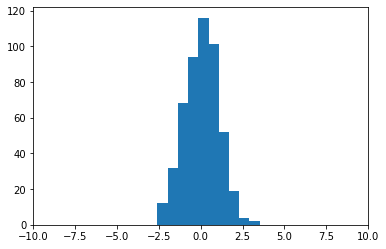

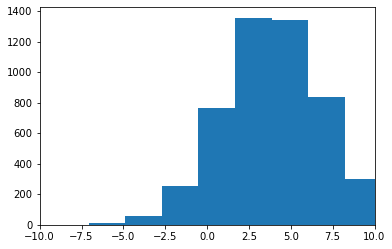

In [75]:
plt.figure()
plt.hist(gaussian_samples)
plt.xlim(-10,10)
plt.figure()
plt.hist(pkg_gaussian_param_samples)
plt.xlim(-10,10)
# plt.figure()
# plt.hist(gaussian_param_samples)
# plt.xlim(-10,10)

### Change mean and variance through change in params `loc` and `scale`

(array([ 10.,  21.,  49.,  57.,  95., 110.,  75.,  58.,  20.,   5.]),
 array([-11.84068898,  -8.58811603,  -5.33554308,  -2.08297013,
          1.16960283,   4.42217578,   7.67474873,  10.92732168,
         14.17989463,  17.43246758,  20.68504053]),
 <BarContainer object of 10 artists>)

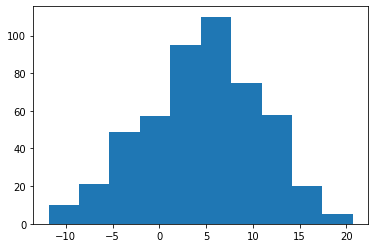

In [7]:
gaussian_samples_mu_sigma = gaussian.rvs(size=500, loc=5, scale=6)
plt.hist(gaussian_samples_mu_sigma)

### integrate the pdf

In [8]:
quad(gaussian.pdf, -2, 2), quad(gaussian_param.pdf, -2, 2, 1)

((0.9544997361036417, 1.8403548653972355e-11),
 (0.9544997361036417, 1.8403548653972355e-11))

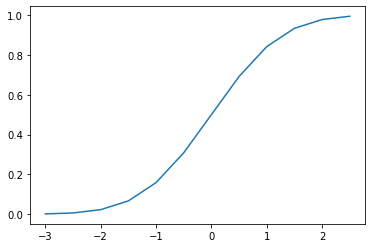

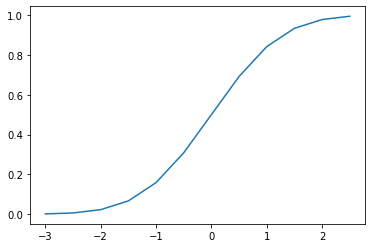

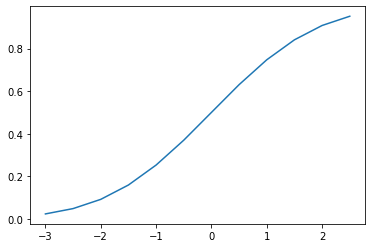

In [9]:
xs = np.arange(-3, 3, 0.5)
plt.plot(xs, gaussian.cdf(xs))
plt.figure()
plt.plot(xs, gaussian_param.cdf(xs, 1))
plt.figure()
plt.plot(xs, gaussian_param.cdf(xs, 1.5))

###  Potentially useful for creating custom distribution with scipy.stats

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html

https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html#making-a-continuous-distribution-i-e-subclassing-rv-continuous

https://www.google.com/search?q=python+scipy+stats+custom+distribution&rlz=1C1CHBF_en-GBGB772GB772&oq=python+scipy+stats+custom+distribution&aqs=chrome..69i57j69i60.14530j0j1&sourceid=chrome&ie=UTF-8

Stats functions: https://docs.scipy.org/doc/scipy/reference/stats.html

Subclassing rv_continuous to create a mixture of pdfs(**relevant**): https://stackoverflow.com/questions/42552117/subclassing-of-scipy-stats-rv-continuous

fit rv continuous https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.fit.html

mix of dists https://stackoverflow.com/a/47763145/1273751

Marcelo's link about distributions for reaction times: https://lindeloev.github.io/shiny-rt/

## Creating a mixture of exponential and Gaussian

https://stackoverflow.com/a/51947128/1273751
Maybe using the CDF will make it faster

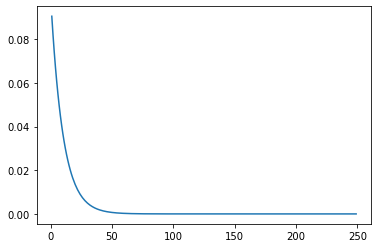

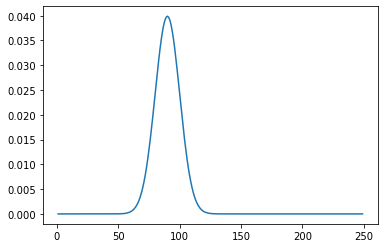

In [10]:
xs = np.arange(1, 250)
plt.plot(xs, stats.expon.pdf(xs, scale=10))
plt.figure()
plt.plot(xs, stats.norm.pdf(xs, loc=90, scale=10))

In [89]:
# class mixture_exp_gaussian_dist(stats.rv_continuous):
#     "Mixture of Exponential and Gaussian distribution"
#     def _pdf(self, x, w, lbd, sigma):
#         return w*lbd*np.exp(-lbd*x) + (1-w) * np.exp(-(x-90)**2/(2*sigma**2)) / (np.sqrt(2*np.pi)*sigma) 

# class mixture_exp_gaussian_dist(stats.rv_continuous):
#     "Mixture of Exponential and Gaussian distribution"
#     def _pdf(self, x, w, exp_scale, sigma):
#         return w*stats.expon.pdf(x, scale=exp_scale) + (1-w) * np.exp(-(x-90)**2/(2*sigma**2)) / (np.sqrt(2*np.pi)*sigma) 

# class mixture_exp_gaussian_dist(stats.rv_continuous):
#     "Mixture of Exponential and Gaussian distribution"
#     def _pdf(self, x, w, exp_scale, sigma):
#         return w*stats.expon.pdf(x, scale=exp_scale) + (1-w) * stats.norm.pdf(x, loc=90, scale=sigma)

class mixture_exp_gaussian_dist(stats.rv_continuous):
    "Mixture of Exponential and Gaussian distribution"
    def _pdf(self, x):
        exp_scale = 10 # lambda
        sigma = 10.
        w = .5
        return w*stats.expon.pdf(x, scale=exp_scale) + (1-w) * stats.norm.pdf(x, loc=90, scale=sigma)
    
mix = mixture_exp_gaussian_dist(name='mixture_exp_gaussian_dist')
mix.numargs, mix.shapes

(0, None)

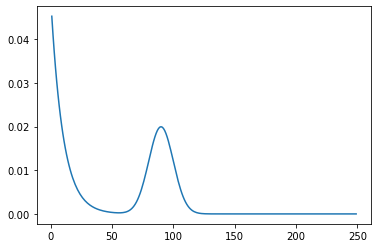

In [90]:
# params
# lbd = 0.1 # lambda
exp_scale = 10 # lambda
# mu = 90
sigma = 10.
w = .5
xs = np.arange(1, 250)

# plt.figure()
# plt.plot(xs, mix.pdf(xs, w, exp_scale, sigma))

plt.figure()
plt.plot(xs, mix.pdf(xs))

# plt.figure()
# plt.plot(mix.cdf(np.arange(1, 50, 0.5), w, exp_scale, sigma))  # NOT SURE WHY THIS RAISES AN OVERFLOW WARNING AND DOES NOT PLOT

Sometimes the sampling below raises "RuntimeError: Failed to converge after 100 iterations."

Maybe it is useful checking for a way to increase the number of interactions

In [81]:
# mix.rvs(w, exp_scale, sigma, size=10)

samples = mix.rvs(size=30)
plt.hist(samples)

RuntimeError: Failed to converge after 100 iterations.

In [ ]:
mix.fit(samples)

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 4.]),
 array([ 5.54563665, 14.53045461, 23.51527257, 32.50009052, 41.48490848,
        50.46972643, 59.45454439, 68.43936234, 77.4241803 , 86.40899825,
        95.39381621]),
 <BarContainer object of 10 artists>)

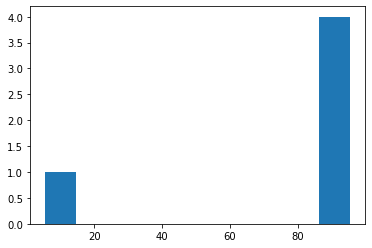

In [207]:
import scipy
from scipy import stats
from scipy.stats import rv_continuous
from scipy.integrate import quad

class mixture_exp_gaussian_dist(stats.rv_continuous):
    "Mixture of Exponential and Gaussian distribution"
    def _pdf(self, x):
        exp_scale = 10 # lambda
        sigma = 5.
        w = .5
        return w*stats.expon.pdf(x, scale=exp_scale) + (1-w) * stats.norm.pdf(x, loc=90, scale=sigma)
    
mix = mixture_exp_gaussian_dist(name='mixture_exp_gaussian_dist')

samples = mix.rvs(size=5)
plt.hist(samples)

If the exponential has parameters, we can integrate it like this:

In [21]:
quad(mix.pdf, 1, 300)[0]

0.9524187090179328

## Cumulative distribution for the mixed by interpolation

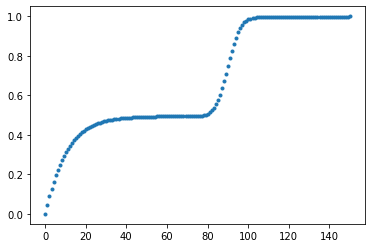

In [208]:
x0=.1
xend=150
xs = np.arange(x0, xend)
xs = list(xs)
ys = [quad(mix.pdf, x0, x)[0] for x in xs]
ys.append(1)
xs.append(xend)
cdf_interpolated = interp1d(xs, ys)
plt.plot(xs, ys, '.')

In [210]:
x = array([0, 10,300, 120, 119, 199.5])
# x = array([1100])
# x = 0.  # error TypeError: 'float' object is not subscriptable
# x = 0  # error TypeError: 'int' object is not subscriptable
def mix_cdf_interp(x):
    if type(x)==ndarray:
        res = zeros(len(x))
    else:
        res = 0
    interpolation_zone=where(logical_and(x>x0, x<xend))
    res[interpolation_zone]=cdf_interpolated(x[interpolation_zone])
    res[where(x>=xend)]=1
    return res
# res
mix_cdf_interp(x)

array([0.        , 0.31100016, 1.        , 0.99502184, 0.99502152,
       1.        ])

In [211]:
class mix_exp_gaussian_interp(stats.rv_continuous):
    "Mixture of Exponential and Gaussian distribution"
    def _cdf(self, x):
        return mix_cdf_interp(x)
    
mix_interp = mix_exp_gaussian_interp(name='mix_interp')
mix_interp.numargs, mix_interp.shapes

(0, None)

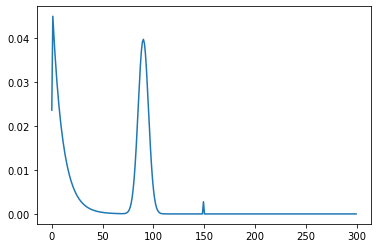

In [212]:
xs=arange(.1, 300)
plot(xs, mix_interp.pdf(xs))

(array([589., 397., 209., 129.,  84.,  42.,  31.,  20.,   9.,   2.,   2.,
          2.,   1.,   0.,   2.,  40., 185., 508., 491., 207.,  32.,   4.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  14.]),
 array([1.02839242e-01, 5.09595225e+00, 1.00890653e+01, 1.50821783e+01,
        2.00752913e+01, 2.50684043e+01, 3.00615173e+01, 3.50546303e+01,
        4.00477433e+01, 4.50408563e+01, 5.00339693e+01, 5.50270823e+01,
        6.00201953e+01, 6.50133084e+01, 7.00064214e+01, 7.49995344e+01,
        7.99926474e+01, 8.49857604e+01, 8.99788734e+01, 9.49719864e+01,
        9.99650994e+01, 1.04958212e+02, 1.09951325e+02, 1.14944438e+02,
        1.19937551e+02, 1.24930664e+02, 1.29923777e+02, 1.34916890e+02,
        1.39910003e+02, 1.44903116e+02, 1.49896230e+02]),
 <BarContainer object of 30 artists>)

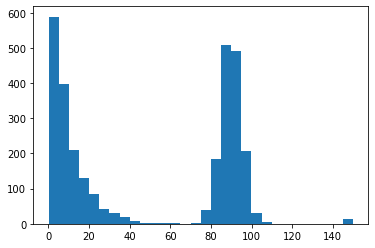

In [218]:
interp_samples = mix_interp.rvs(size=3000)
plt.hist(interp_samples, bins=30)

In [219]:
mix_interp.fit(interp_samples)

(0.0022784366648755166, 0.9996013925014995)

## `rv_continuous` created with standard CDF (best method)

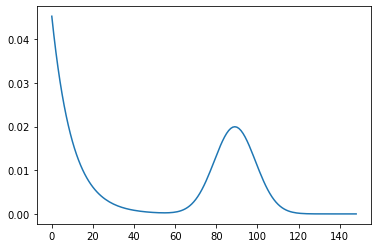

In [260]:
class mix_exp_gaussian_cdf_dist(stats.rv_continuous):
    "Mixture of Exponential and Gaussian distribution"
    def _cdf(self, x, exp_scale, sigma):
#         exp_scale = 10 # lambda
#         sigma = 10.
        w = .5
        return w*stats.expon.cdf(x, scale=exp_scale) + (1-w) * stats.norm.cdf(x, loc=90, scale=sigma)
mix_cdf = mix_exp_gaussian_cdf_dist()
# w = .5
# exp_scale = 10
# sigma=5
xs = arange(1, 150)
# f = w*stats.expon.cdf(xs, scale=exp_scale) + (1-w) * stats.norm.cdf(xs, loc=90, scale=sigma)
plot(mix_cdf.pdf(xs, exp_scale=10, sigma=10))

In [250]:
cdf_samples = mix_cdf.rvs(exp_scale=10, sigma=10, size=1000)

(array([173., 104.,  73.,  57.,  37.,  24.,  10.,   9.,   9.,   3.,   6.,
          4.,   1.,   2.,   2.,   2.,   5.,   9.,  19.,  37.,  64.,  68.,
         77.,  71.,  51.,  40.,  26.,  15.,   1.,   1.]),
 array([6.41246805e-02, 4.05532364e+00, 8.04652260e+00, 1.20377216e+01,
        1.60289205e+01, 2.00201195e+01, 2.40113184e+01, 2.80025174e+01,
        3.19937163e+01, 3.59849153e+01, 3.99761143e+01, 4.39673132e+01,
        4.79585122e+01, 5.19497111e+01, 5.59409101e+01, 5.99321090e+01,
        6.39233080e+01, 6.79145070e+01, 7.19057059e+01, 7.58969049e+01,
        7.98881038e+01, 8.38793028e+01, 8.78705017e+01, 9.18617007e+01,
        9.58528997e+01, 9.98440986e+01, 1.03835298e+02, 1.07826497e+02,
        1.11817695e+02, 1.15808894e+02, 1.19800093e+02]),
 <BarContainer object of 30 artists>)

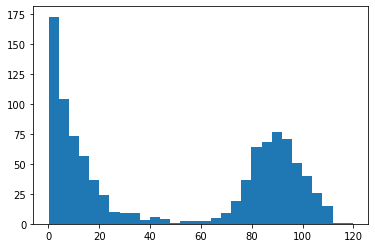

In [251]:
plt.hist(cdf_samples, bins=30)

### Fitting is not working well

In [267]:
exp_scale, sigma, loc, scale = mix_cdf.fit(cdf_samples)
exp_scale, sigma, loc, scale

(1.0232228108938246, 1.0263400739772615, 6.630114957851436, 0.9460437514660041)

In [266]:
exp_scale, sigma, loc, scale = mix_cdf.fit(cdf_samples, floc=0, fscale=1)
exp_scale, sigma, loc, scale

(1.029215202979219, 0.9381596799510586, 0, 1)

In [265]:
exp_scale, sigma, loc, scale = mix_cdf.fit(cdf_samples, fsigma=10, floc=0, fscale=1)
exp_scale, sigma, loc, scale

(10.313671875000022, 10, 0, 1)